# 주제 : 새로 출시된 게임, 전문가 리뷰 믿고 바로 구매해도 될까요? 직접 데이터로 분석하고 판단해 보자!
----------

## 실습 가이드
    1. 데이터를 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Video Game Sales with Ratings을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    Video_Games_Sales_as_at_22_Dec_2016.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    Name: 게임의 이름
    Platform: 게임이 동작하는 콘솔
    Year_of_Release: 발매 년도
    Genre: 게임의 장르
    Publisher: 게임의 유통사
    NA_Sales: 북미 판매량 (Millions)
    EU_Sales: 유럽 연합 판매량 (Millions)
    JP_Sales: 일본 판매량 (Millions)
    Other_Sales: 기타 판매량 (아프리카, 일본 제외 아시아, 호주, EU 제외 유럽, 남미) (Millions)
    Global_Sales: 전국 판매량
    Critic_Score: Metacritic 스태프 점수
    Critic_Count: Critic_Score에 사용된 점수의 수
    User_Score: Metacritic 구독자의 점수
    User_Count: User_Score에 사용된 점수의 수
    Developer: 게임의 개발사
    Rating: ESRB 등급 (19+, 17+, 등등)

    
- 데이터 출처: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

## 최종 목표
    - 흥미로운 일상적인 데이터 분석해 보기
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해

---

## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [2]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
df.shape

(16719, 16)

In [4]:
df.head(5) ## NaN : Not a Number

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 결손 데이터 데이터프레임에서 제거하기


In [6]:
# dropna() 메소드를 이용하여 결손 데이터가 포함된 row를 제거
df.isna().sum()


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [7]:
df.dropna(inplace=True)

### 문제 5. 수치형 데이터의 히스토그램 확인하기


In [8]:
# Seaborn의 histplot()을 이용하여 히스토그램 확인
# 값의 범위가 넓어 히스토그램 분석이 어려울 경우, 아웃라이어를 제거하면서 히스토그램 확인
df.columns





Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

<AxesSubplot:xlabel='Year_of_Release', ylabel='Count'>

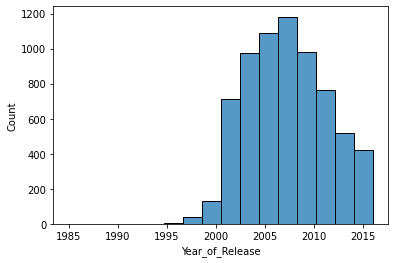

In [15]:
sns.histplot(x = 'Year_of_Release', data = df, bins = 16)

### 문제 6. 수치형 데이터와 전국 판매량의 Jointplot 분석하기

In [24]:
# 수치형 데이터와 전국 판매량의 관계를 Seaborn의 jointplot()으로 시각화/분석
df['User_Score'] = df['User_Score'].apply(float)

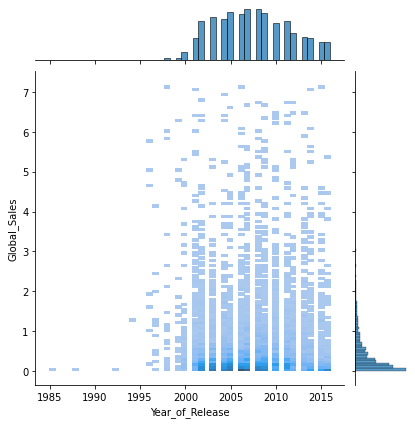

In [25]:
sns.jointplot(x = 'Year_of_Release', y = 'Global_Sales', data = df, kind = 'hist')

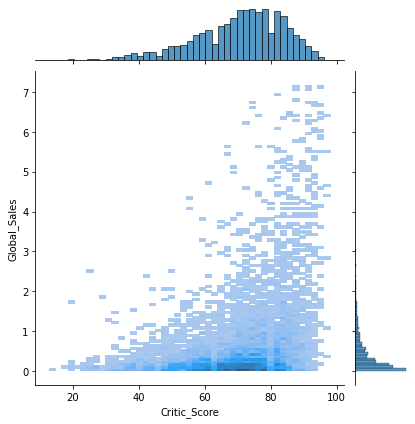

In [26]:
sns.jointplot(x = 'Critic_Score', y = 'Global_Sales', data = df, kind = 'hist')

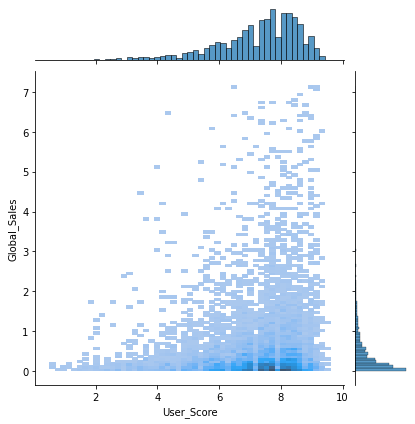

In [27]:
sns.jointplot(x = 'User_Score', y = 'Global_Sales', data = df, kind = 'hist')

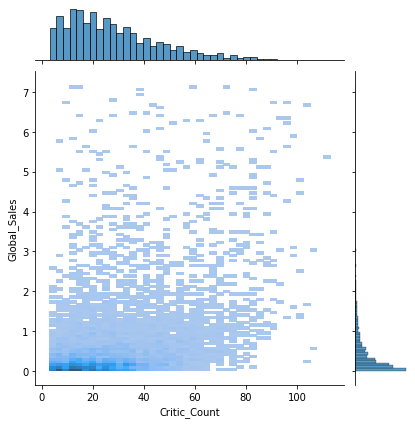

In [28]:
sns.jointplot(x = 'Critic_Count', y = 'Global_Sales', data = df, kind = 'hist')

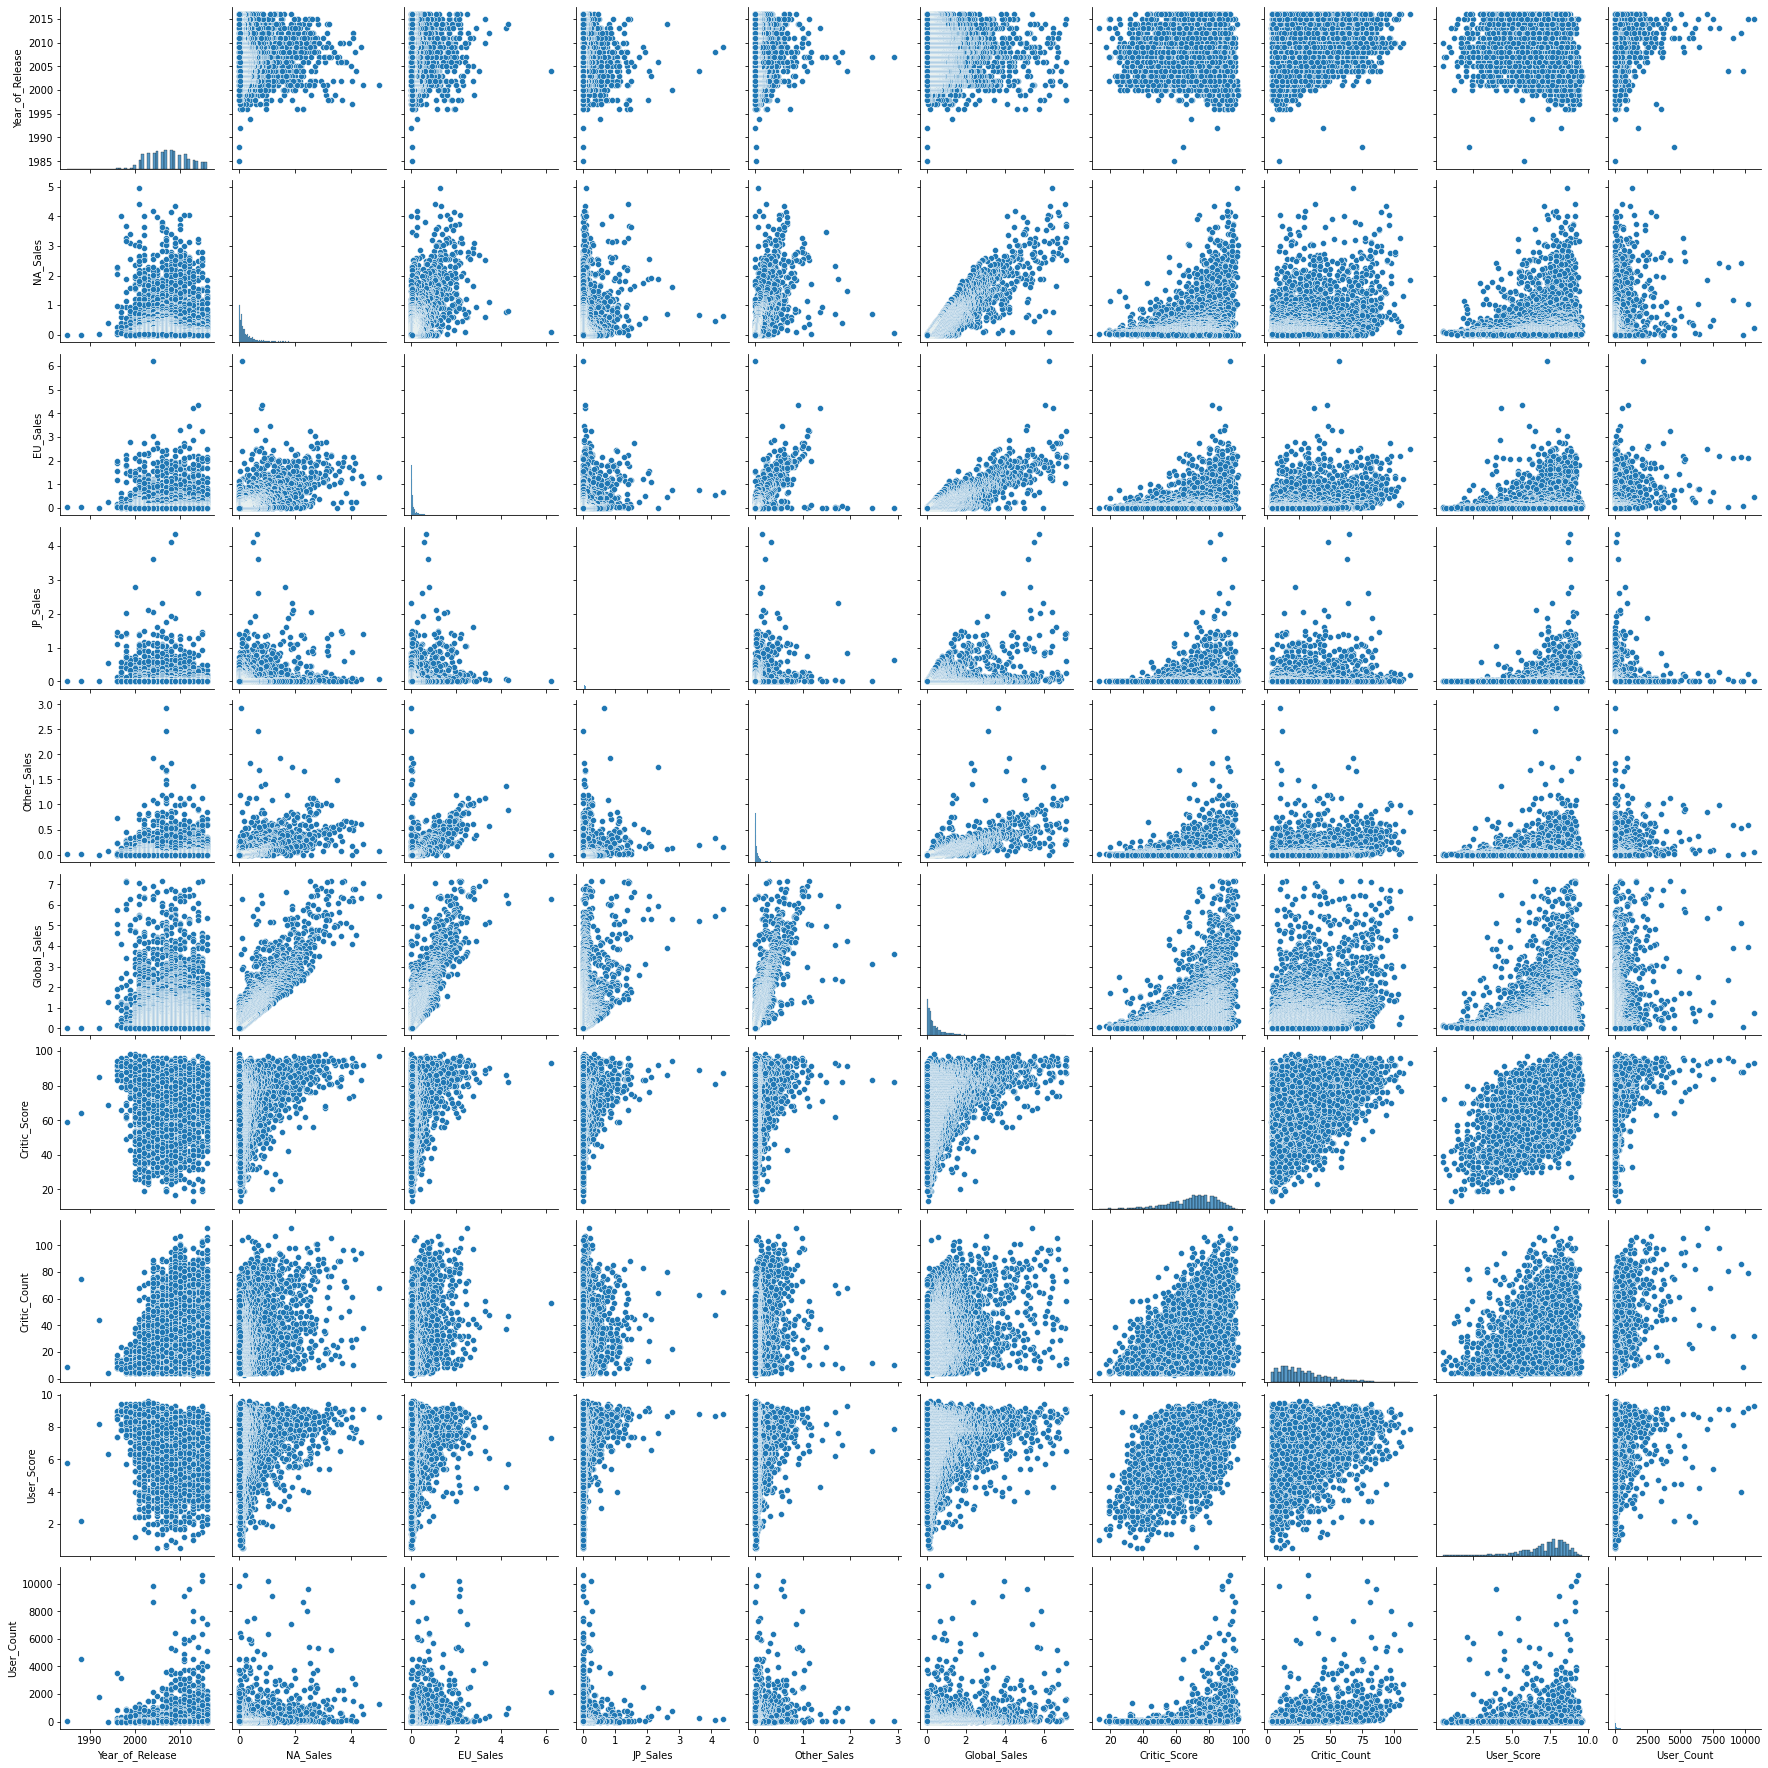

In [29]:
sns.pairplot(df)

<AxesSubplot:xlabel='Global_Sales', ylabel='Count'>

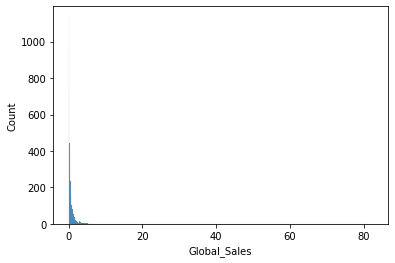

In [16]:

sns.histplot(x = 'Global_Sales', data = df)


<AxesSubplot:xlabel='Global_Sales'>

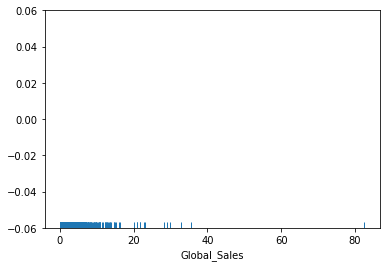

In [17]:
sns.rugplot(x= 'Global_Sales', data = df)

{'whiskers': [<matplotlib.lines.Line2D at 0x2834aae44c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2834bac9d88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2834b914c08>],
 'medians': [<matplotlib.lines.Line2D at 0x2834bacfb88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2834be20108>],
 'means': []}

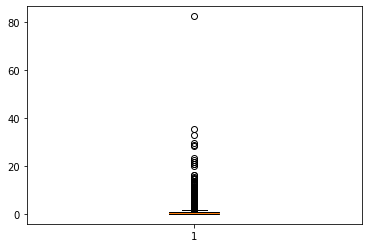

In [18]:
plt.boxplot(df.Global_Sales)

In [19]:
df[df['Global_Sales']>30]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E


In [20]:
gs = df['Global_Sales'].quantile(0.99) ## 

In [21]:
df = df[df['Global_Sales'] < gs]

<AxesSubplot:xlabel='Global_Sales', ylabel='Count'>

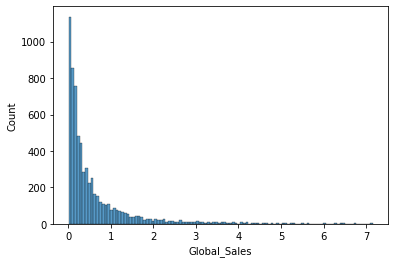

In [22]:
sns.histplot(x= 'Global_Sales', data= df)

<AxesSubplot:xlabel='Global_Sales', ylabel='Count'>

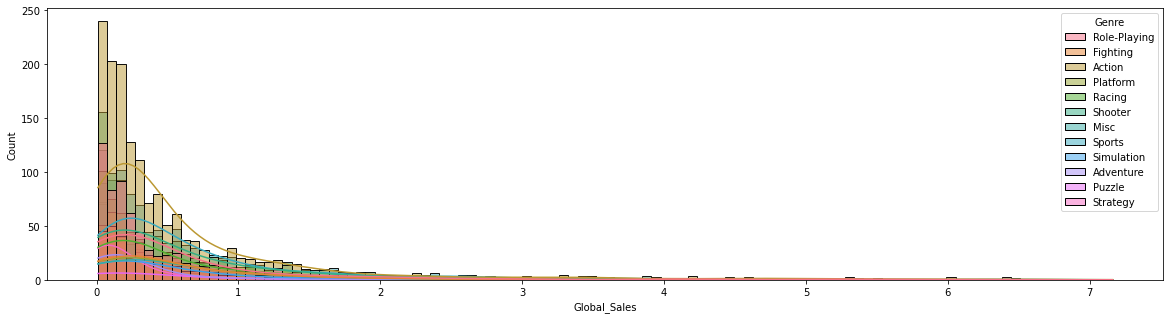

In [23]:
fig = plt.figure(figsize = (20,5))
sns.histplot(x= 'Global_Sales', hue= 'Genre', kde =True, data = df)

### 문제 7. 범주형 데이터의 범주별 전국 판매량의 Boxplot 분석하기

<AxesSubplot:xlabel='Platform', ylabel='Global_Sales'>

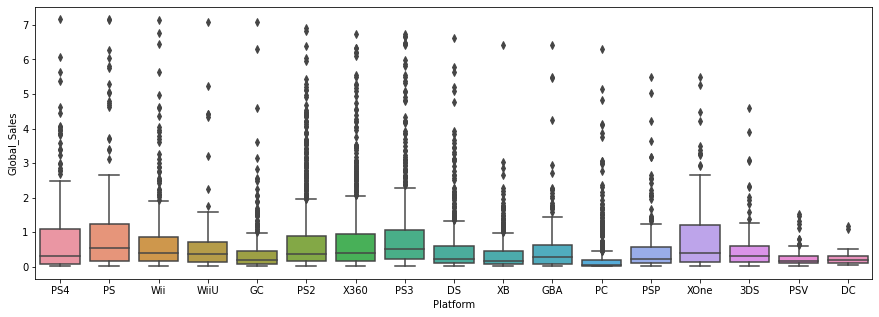

In [31]:
# 범주형 데이터별 전국 판매량의 Boxplot 시각화/분석
fig = plt.figure(figsize = (15,5))
sns.boxplot(x = 'Platform', y = 'Global_Sales', data = df )





<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

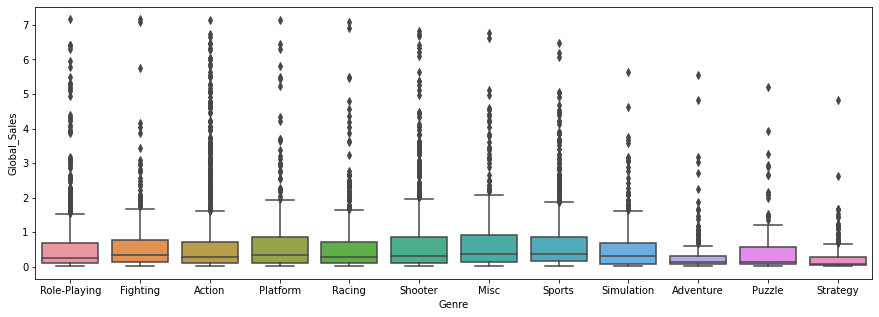

In [32]:
fig = plt.figure(figsize = (15,5))
sns.boxplot(x = 'Genre', y = 'Global_Sales', data = df )


<AxesSubplot:xlabel='Publisher', ylabel='Global_Sales'>

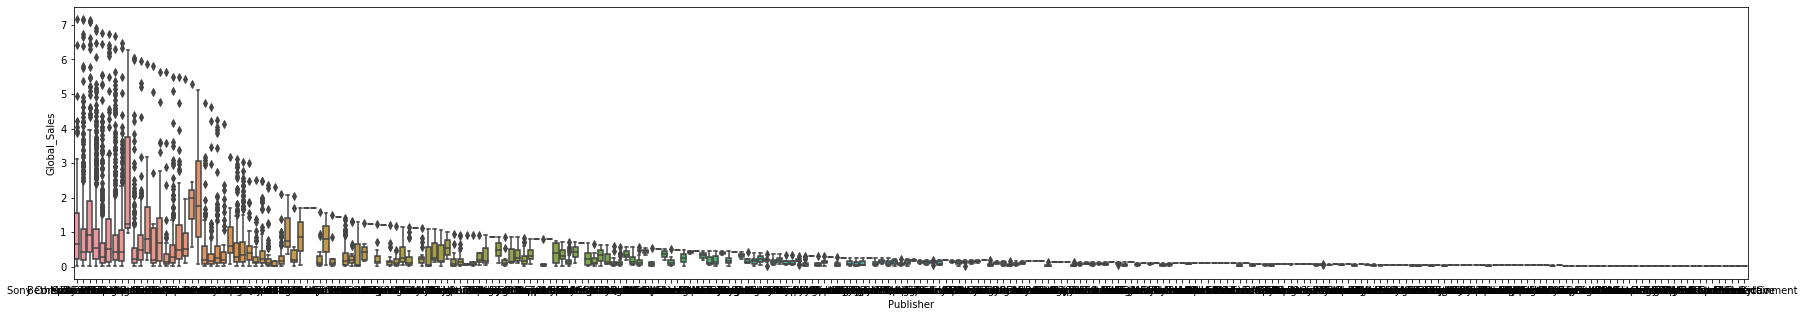

In [33]:
fig = plt.figure(figsize = (30,5))
sns.boxplot(x = 'Publisher', y = 'Global_Sales', data = df )


<AxesSubplot:xlabel='Developer', ylabel='Global_Sales'>

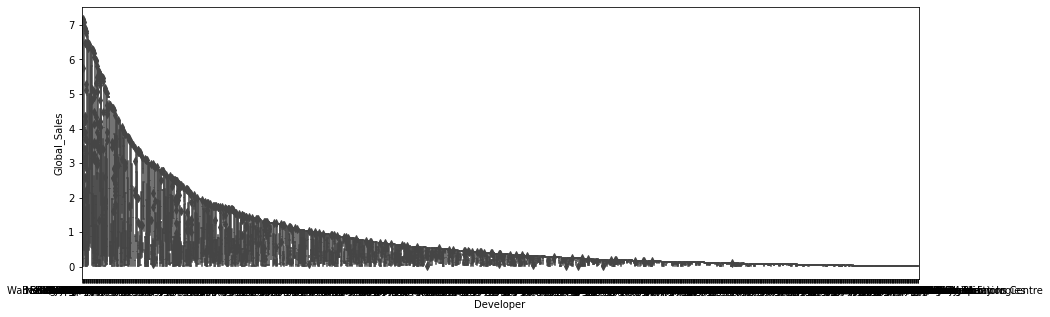

In [34]:
fig = plt.figure(figsize = (15,5))
sns.boxplot(x = 'Developer', y = 'Global_Sales', data = df )


### 문제 8. 전문가 평점과 사용자 평점의 차이 분석하기

<AxesSubplot:ylabel='Critic_Score'>

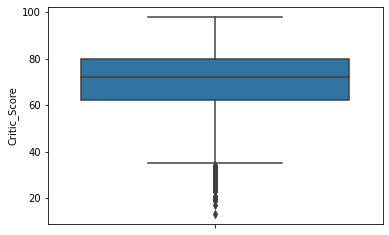

In [36]:
# Seaborn 시각화로 전문가 평점과 사용자 평점의 통계 비교/분석하기
# Hint) 두 값의 범위가 다르므로, 범위를 동일하게 맞추어 비교
# Tip) 별도의 DataFrame을 구성하여 boxplot으로 비교하면 편리함
sns.boxplot(y = 'Critic_Score', data = df)




<AxesSubplot:ylabel='User_Score'>

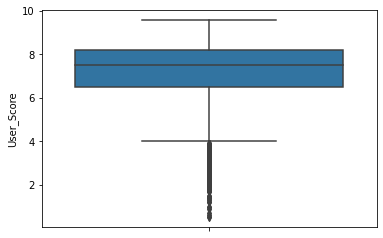

In [37]:
sns.boxplot(y = 'User_Score', data = df)

In [38]:
critic_score = df[['Critic_Score']].copy()

In [39]:
critic_score.rename({'Critic_Score' : 'Score'}, axis= 1, inplace = True)

In [40]:
critic_score['scoreBy'] = 'Critics'

In [45]:
user_score = df[['User_Score']].copy() * 10
user_score.rename({'User_Score' : 'Score'}, axis = 1, inplace = True)
user_score['scoreBy'] = 'User'

In [46]:
scores = pd.concat([critic_score, user_score])

<AxesSubplot:xlabel='scoreBy', ylabel='Score'>

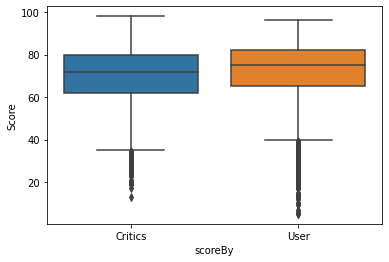

In [47]:
sns.boxplot(x = 'scoreBy', y= 'Score', data = scores)

### 문제 9. 수치형 데이터간의 상관성 시각화하기

<AxesSubplot:>

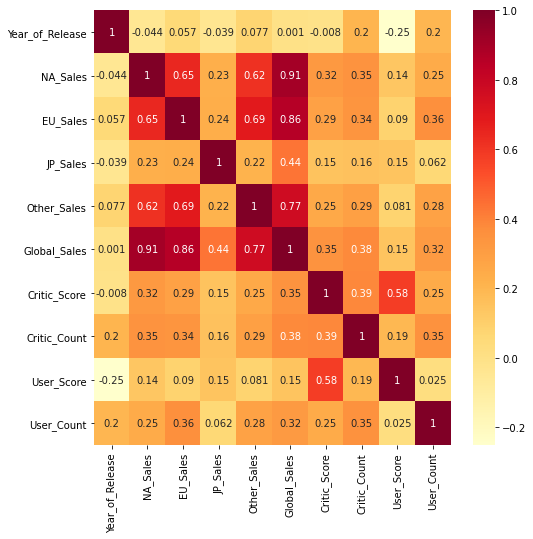

In [48]:
# Correlation Heatmap 시각화하기
fig = plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')





## Step 3. 모델 학습을 위한 데이터 전처리 

### 문제 10. 범주형 데이터에서 소수 범주를 others로 대체하기

In [ ]:
# 범주형 데이터 중 범주가 너무 적은 경우 others 범주로 대체하기
# Hint) value_counts()를 이용하여 범주별 개수를 확인







### 문제 11. get_dummies를 이용한 범주형 데이터 전처리


In [ ]:
X_cat = 





## Step 4. 전국 판매량 Regression 모델 학습하기

### 문제 12. 전국 판매량 추정을 위한 입출력 데이터 구성하기


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# 전국 판매량 추정을 위해 적절한 입력과 출력 컬럼 선정
# 수치형 데이터는 StandardScaler를 이용해 표준화

scaler = 
X = 
y = 




In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = 





### 문제 13. XGBoost 모델 생성/학습하기

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# XGBRegressor 모델 생성/학습
model_xgb = 




### 문제 14. Linear Regression 모델 생성/학습하기

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# LinearRegression 모델 생성/학습
model_lr




### 문제 15. 모델 학습 결과 평가하기

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [ ]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred_xgb = 
pred_lr = 






### 문제 16. 실제 값과 추측 값의 Scatter plot 시각화하기


In [ ]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기






### 문제 17. XGBoost 모델의 Feature Importance 시각화하기

## Step 5. 유저 평점 Regression 모델 학습하기

### 문제 18. 유저 평점 추정을 위한 입출력 데이터 구성하기


In [ ]:
# 유저 평점 추정을 위해 적절한 입력과 출력 컬럼 선정
# 수치형 데이터는 StandardScaler를 이용해 표준화

scaler = 
X = 
y = 




In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = 





### 문제 19. XGBoost 모델 생성/학습하기

In [ ]:
# XGBRegressor 모델 생성/학습
model_xgb = 




### 문제 20. Linear Regression 모델 생성/학습하기

In [ ]:
# LinearRegression 모델 생성/학습
model_lr = 




### 문제 21. 모델 학습 결과 평가하기

In [ ]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred_xgb = 
pred_lr = 





### 문제 22. 실제 값과 추측 값의 Scatter plot 시각화하기


In [ ]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기






### 문제 23. XGBoost 모델의 Feature Importance 시각화하기